# Final Project Research. Product Analysis.

# Introduction

**Project Overview** 

As a junior analyst at TTWC Consulting Agency, I am conducting a sales audit for AtliQ Hardware, a leading computer hardware producer in India. This project aims to provide insights into product performance and automate their sales data processes.

**Objectives**

1. Product Analysis:

* Identify bestsellers.
* Suggest improvements for sales.
* Analyze changes in product popularity over time and across markets.

2. **Discount Strategy Optimization:**

* Conduct A/B testing with current (control group) and adjusted (test group) discount levels.
* Determine the optimal discount level to maximize sales without sacrificing profitability.

**Methodology**

1. Data Analysis Using SQL:

* Extract and analyze sales data to identify trends and bestsellers.

2. A/B Testing:

* Compare the impact of different discount levels on sales quantity and revenue.
* Use statistical analysis to determine the significance of the results.

**Tools** 

* Jupyter Notebook: For organizing and executing SQL queries.
* SQL: For data extraction and analysis.

**Expected Outcomes** 

* AtliQ Hardware will gain insights into product performance and an optimized discount strategy to enhance sales and profitability.









## Data Preprocessing 

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy import stats as st
import warnings
import math
from statsmodels.stats.proportion import proportions_ztest

In [4]:
# connect to the database
con = sqlite3.connect('atliq_db.sqlite3')

In [5]:
# check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


### dim_customer dataset 

In [6]:
query_1="""Select * from 
dim_customer
"""
dim_customer=pd.read_sql_query(query_1, con)
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [7]:
miss_qry1 = """
SELECT COUNT(*) FROM 
dim_customer
WHERE 
customer_code IS NULL OR customer IS NULL OR platform IS NULL OR channel IS NULL OR market IS NULL OR sub_zone IS NULL OR region IS NULL"""

miss_val1 = pd.read_sql_query(miss_qry1, con)
miss_val1

,COUNT(*)
0,0


In [8]:
dup_qry1 = """
SELECT customer_code, customer, platform, channel, market, sub_zone, region, COUNT(*) FROM 
dim_customer
GROUP BY customer_code, customer, platform, channel, market, sub_zone, region
HAVING COUNT (*) > 1
"""

dup1 = pd.read_sql_query(dup_qry1, con)
dup1

,customer_code,customer,platform,channel,market,sub_zone,region,COUNT(*)


**There are no missing values or duplicates in dim_customer dataset.**

### dim_product dataset 

In [9]:
query_2= """Select * from 
dim_product
"""
dim_product = pd.read_sql_query(query_2, con)
dim_product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [10]:
miss_qry2 = """
SELECT COUNT(*) FROM 
dim_product
WHERE 
product_code IS NULL OR division IS NULL OR segment IS NULL OR category IS NULL OR product IS NULL OR variant IS NULL"""

miss_val2 = pd.read_sql_query(miss_qry2, con)
miss_val2

,COUNT(*)
0,0


In [11]:
dup_qry2 = """
SELECT product_code, division, segment, category, product, variant, COUNT(*) FROM 
dim_product
GROUP BY product_code, division, segment, category, product, variant
HAVING COUNT (*) > 1
"""

dup2 = pd.read_sql_query(dup_qry2, con)
dup2

,product_code,division,segment,category,product,variant,COUNT(*)


**There are no missing values or duplicates in dim_customer dataset.**

### fact_pre_discount dataset 

In [12]:
query_3="""Select * from
fact_pre_discount
"""
fact_pre_discount = pd.read_sql_query(query_3, con)
fact_pre_discount.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057


In [13]:
miss_qry3 = """
SELECT COUNT(*) FROM 
fact_pre_discount
WHERE 
customer_code IS NULL OR fiscal_year IS NULL OR pre_invoice_discount_pct IS NULL"""

miss_val3 = pd.read_sql_query(miss_qry3, con)
miss_val3

,COUNT(*)
0,0


In [14]:
dup_qry3 = """
SELECT customer_code, fiscal_year, pre_invoice_discount_pct, COUNT(*) FROM 
fact_pre_discount
GROUP BY customer_code, fiscal_year, pre_invoice_discount_pct
HAVING COUNT (*) > 1
"""

dup3 = pd.read_sql_query(dup_qry3, con)
dup3

,customer_code,fiscal_year,pre_invoice_discount_pct,COUNT(*)


**There are no missing values or duplicates in fact_pre_discount dataset.**

### fact_manufacturing_cost dataset 

In [15]:
query_4="""Select * from
fact_manufacturing_cost
"""
fact_manufacturing_cost = pd.read_sql_query(query_4, con)
fact_manufacturing_cost.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [16]:
miss_qry4 = """
SELECT COUNT(*) FROM 
fact_manufacturing_cost
WHERE 
product_code IS NULL OR cost_year IS NULL OR manufacturing_cost IS NULL"""

miss_val4 = pd.read_sql_query(miss_qry4, con)
miss_val4

,COUNT(*)
0,0


In [17]:
dup_qry4 = """
SELECT product_code, cost_year, manufacturing_cost, COUNT(*) FROM 
fact_manufacturing_cost
GROUP BY product_code, cost_year, manufacturing_cost
HAVING COUNT (*) > 1
"""

dup4 = pd.read_sql_query(dup_qry4, con)
dup4

,product_code,cost_year,manufacturing_cost,COUNT(*)


**There are no missing values or duplicates in fact_manufacturing_cost dataset.**

### fact_gross_price dataset 

In [18]:
query_5="""Select * from
fact_gross_price
"""
fact_gross_price = pd.read_sql_query(query_5, con)
fact_gross_price.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [19]:
miss_qry5 = """
SELECT COUNT(*) FROM 
fact_gross_price
WHERE 
product_code IS NULL OR fiscal_year IS NULL OR gross_price IS NULL"""

miss_val5 = pd.read_sql_query(miss_qry5, con)
miss_val5

,COUNT(*)
0,0


In [20]:
dup_qry5 = """
SELECT product_code, fiscal_year, gross_price, COUNT(*) FROM 
fact_gross_price
GROUP BY product_code, fiscal_year, gross_price
HAVING COUNT (*) > 1
"""

dup5 = pd.read_sql_query(dup_qry5, con)
dup5

,product_code,fiscal_year,gross_price,COUNT(*)


**There are no missing values or duplicates in fact_gross_price dataset.**

### fact_sales_monthly dataset 

In [21]:
query_6="""Select * from
fact_sales_monthly
"""
fact_sales_monthly = pd.read_sql_query(query_6, con)
fact_sales_monthly.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


In [22]:
miss_qry6 = """
SELECT * FROM 
fact_sales_monthly
WHERE 
date IS NULL OR product_code IS NULL OR customer_code IS NULL OR sold_quantity IS NULL OR fiscal_year IS NULL"""

miss_val6 = pd.read_sql_query(miss_qry6, con)
miss_val6

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2019-06-01,A0,None,None,None


In [23]:
dup_qry6 = """
SELECT date, product_code, customer_code, sold_quantity, fiscal_year, COUNT(*) FROM 
fact_sales_monthly
GROUP BY date, product_code, customer_code, sold_quantity, fiscal_year
HAVING COUNT (*) > 1
"""

dup6 = pd.read_sql_query(dup_qry6, con)
dup6

,date,product_code,customer_code,sold_quantity,fiscal_year,COUNT(*)


There are no duplicates in fact_sales_monthly dataframe and there is only one missing value  

## Hypotheses 

### Price Sensitivity

In [24]:
dim_product

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard
...,...,...,...,...,...,...
392,A7220160202,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Plus
393,A7220160203,N & S,Networking,Wi fi extender,AQ Wi Power Dx2,Premium
394,A7321160301,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Standard
395,A7321160302,N & S,Networking,Wi fi extender,AQ Wi Power Dx3,Plus


In [25]:
fact_sales_monthly

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
...,...,...,...,...,...
67246,2019-06-01,A0418150104,90013124.0,16.0,2019.0
67247,2019-06-01,A0418150104,90014136.0,2.0,2019.0
67248,2019-06-01,A0418150104,90014137.0,1.0,2019.0
67249,2019-06-01,A0418150104,90014140.0,3.0,2019.0


In [26]:
fact_gross_price

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
...,...,...,...
1177,A7321160301,2022,44.6260
1178,A7321160302,2021,43.9446
1179,A7321160302,2022,46.0399
1180,A7321160303,2021,42.8483


Let's compare the results on the example of 3 random different products.

In [27]:
price_qry = """
select distinct 
    dim_product.product_code, 
    dim_product.product,
    dim_product.variant,
    fact_gross_price.fiscal_year,
    fact_gross_price.gross_price
from 
    dim_product 
left join 
    fact_gross_price on fact_gross_price.product_code = dim_product.product_code 
where 
    dim_product.product_code = 'A0118150103'
    or dim_product.product_code = 'A0220150203'
    or dim_product.product_code = 'A0418150101'
group by 
     dim_product.product_code,
     dim_product.product,
     dim_product.variant,
     fact_gross_price.fiscal_year 
"""
price = pd.read_sql_query(price_qry, con)
price 

,product_code,product,variant,fiscal_year,gross_price
0,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2018,19.3630
1,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2019,19.3442
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2020,22.1317
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2021,21.7795
4,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2022,23.9920
5,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,2020,23.9193
6,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,2021,23.6154
7,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,2022,25.7806
8,A0418150101,AQ Mforce Gen X,Standard 1,2018,15.8753
9,A0418150101,AQ Mforce Gen X,Standard 1,2019,14.0555


We determined that the price of each product increaces or decreaces yearly. So we will compare the results based on yearly changes.

We see that the price of every product notable increases from the first to the last year in our dataset. 

In [28]:
sold_qry = """
select distinct 
    dim_product.product_code, 
    dim_product.product,
    dim_product.variant,
    fact_sales_monthly.fiscal_year,
    sum(fact_sales_monthly.sold_quantity) as sold_quantity 
from 
    dim_product 
left join 
    fact_sales_monthly on fact_sales_monthly.product_code = dim_product.product_code 
where 
    dim_product.product_code = 'A0118150103'
    or dim_product.product_code = 'A0220150203'
    or dim_product.product_code = 'A0418150101'
group by 
     dim_product.product_code,
     dim_product.product,
     dim_product.variant,
     fact_sales_monthly.fiscal_year 
"""
sold = pd.read_sql_query(sold_qry, con)
sold

,product_code,product,variant,fiscal_year,sold_quantity
0,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2018,18754
1,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2019,42191
2,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2020,61748
3,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2021,94481
4,A0118150103,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2022,162972
5,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,2020,63680
6,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,2021,97815
7,A0220150203,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,2022,165516
8,A0418150101,AQ Mforce Gen X,Standard 1,2018,21842
9,A0418150101,AQ Mforce Gen X,Standard 1,2019,32453


Despite on increase of the products prices we also see that sales increase on 50% or even twise yearly. Based on our research we can say that price does not affect on sales. But it still important do not make products overpriced. 

### Customer Segmentation by Region

In [29]:
dim_customer.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [30]:
dim_product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [31]:
fact_sales_monthly.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0


In [32]:
top_product_qry ="""
Select distinct
    dim_customer.market,
    fact_sales_monthly.product_code,
    SUM(fact_sales_monthly.sold_quantity) as 'quantity_sold',
    dim_product.product,
    dim_product.variant,
    dim_product.category
From 
    dim_customer
Left join
    fact_sales_monthly on fact_sales_monthly.customer_code = dim_customer.customer_code
Left join 
    dim_product on dim_product.product_code = fact_sales_monthly.product_code
Where 
    dim_customer.market = 'China'
    or dim_customer.market = 'India'
Group by 
    dim_customer.market,
    fact_sales_monthly.product_code,
    dim_product.product,
    dim_product.variant
Order by
    SUM(fact_sales_monthly.sold_quantity) desc
"""

top_product = pd.read_sql_query(top_product_qry, con)
top_product

,market,product_code,quantity_sold,product,variant,category
0,India,A0418150103,115233,AQ Mforce Gen X,Standard 3,Graphic Card
1,India,A0118150104,109809,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus,Internal HDD
2,India,A0118150103,109584,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,Internal HDD
3,India,A0219150201,106249,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard,Internal HDD
4,India,A0219150202,105134,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Plus,Internal HDD
5,India,A0220150203,89193,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Premium,Internal HDD
6,India,A0320150301,88436,AQ Zion Saga,Standard,Internal HDD
7,India,A0321150302,74282,AQ Zion Saga,Plus,Internal HDD
8,India,A0321150303,72191,AQ Zion Saga,Premium,Internal HDD
9,India,A0118150102,66344,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus,Internal HDD


Firstly, it's notable that graphic cards and internal HDDs dominate as the most sought-after products in both India and China. However, there's a stark contrast in sales figures, with India outpacing China significantly. This variance could be attributed to potential marketing gaps in China, despite its immense market potential and large consumer base.

Furthermore, it's intriguing to observe that the top-selling items in both countries largely align, indicating a universal demand for certain tech products across these regions.

### Effect of Pre-Invoice Discounts on Sales

In [33]:
fact_pre_discount

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
...,...,...,...
1040,90027207,2018,0.2803
1041,90027207,2019,0.2248
1042,90027207,2020,0.2386
1043,90027207,2021,0.2772


In [34]:
fact_sales_monthly

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
...,...,...,...,...,...
67246,2019-06-01,A0418150104,90013124.0,16.0,2019.0
67247,2019-06-01,A0418150104,90014136.0,2.0,2019.0
67248,2019-06-01,A0418150104,90014137.0,1.0,2019.0
67249,2019-06-01,A0418150104,90014140.0,3.0,2019.0


In [35]:
discounts_qry = """
Select distinct
    fact_pre_discount.customer_code,
    fact_pre_discount.fiscal_year,
    fact_pre_discount.pre_invoice_discount_pct * 100 as persent_of_discount,
    SUM(fact_sales_monthly.sold_quantity) as quantity_sold
From 
    fact_pre_discount 
Left join 
    fact_sales_monthly on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    and fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
Group by 
    fact_pre_discount.customer_code,
    fact_pre_discount.fiscal_year,
    fact_pre_discount.pre_invoice_discount_pct 
"""

discounts = pd.read_sql_query(discounts_qry, con)
discounts.head(50)

,customer_code,fiscal_year,persent_of_discount,quantity_sold
0,70002017,2018,8.24,3782.0
1,70002017,2019,7.77,7063.0
2,70002017,2020,7.35,6987.0
3,70002017,2021,7.03,14876.0
4,70002017,2022,10.57,20405.0
5,70002018,2018,29.56,3992.0
6,70002018,2019,25.77,7083.0
7,70002018,2020,22.55,11200.0
8,70002018,2021,20.61,16113.0
9,70002018,2022,29.31,22750.0


Based on the table, it is evident that regardless of the discount size, the number of sales per customer increases yearly. Therefore, we cannot conclusively say that the discount has a significant effect on sales.

### Seasonal Trends in Sales

In [36]:
fact_sales_monthly

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018.0
1,2017-09-01,A0118150101,70002018.0,77.0,2018.0
2,2017-09-01,A0118150101,70003181.0,17.0,2018.0
3,2017-09-01,A0118150101,70003182.0,6.0,2018.0
4,2017-09-01,A0118150101,70006157.0,5.0,2018.0
...,...,...,...,...,...
67246,2019-06-01,A0418150104,90013124.0,16.0,2019.0
67247,2019-06-01,A0418150104,90014136.0,2.0,2019.0
67248,2019-06-01,A0418150104,90014137.0,1.0,2019.0
67249,2019-06-01,A0418150104,90014140.0,3.0,2019.0


In [37]:
season_qry = """
SELECT 
    strftime('%m', fact_sales_monthly.date) AS month,
    AVG(fact_sales_monthly.sold_quantity) AS average_sales 
FROM 
    fact_sales_monthly
GROUP BY 
    month;
"""

season = pd.read_sql_query(season_qry, con)
season

,month,average_sales
0,01,32.871494
1,02,32.737409
2,03,24.940510
3,04,28.331552
4,05,29.203300
5,06,31.810646
6,07,32.481745
7,08,33.340999
8,09,65.662025
9,10,82.731373


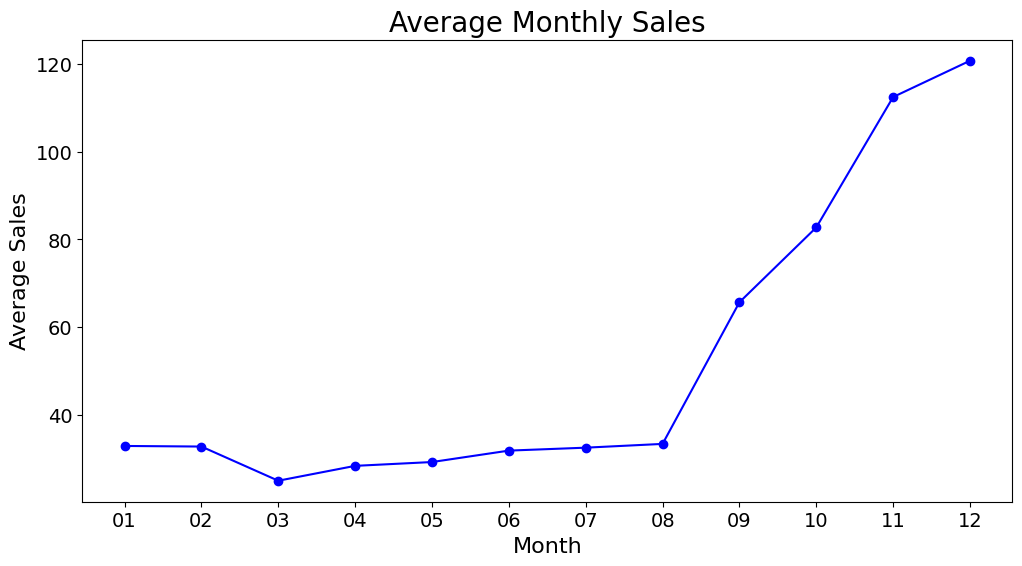

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(season['month'], season['average_sales'], marker='o', linestyle='-', color='b')
plt.title('Average Monthly Sales', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Average Sales', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Based on the table and graph, the highest sales were observed in October, November, and December. This increase in sales is likely due to the winter holidays, including Christmas and New Year.

## A/B Testing 

In [39]:
discounts

,customer_code,fiscal_year,persent_of_discount,quantity_sold
0,70002017,2018,8.24,3782.0
1,70002017,2019,7.77,7063.0
2,70002017,2020,7.35,6987.0
3,70002017,2021,7.03,14876.0
4,70002017,2022,10.57,20405.0
...,...,...,...,...
1040,90027207,2018,28.03,570.0
1041,90027207,2019,22.48,956.0
1042,90027207,2020,23.86,1441.0
1043,90027207,2021,27.72,671.0


In [40]:
discounts['persent_of_discount'].describe()

count    1045.000000
mean       23.380660
std         5.807724
min         5.100000
25%        20.480000
50%        24.390000
75%        27.670000
max        30.990000
Name: persent_of_discount, dtype: float64

50% is 24.4 so control group is group with discount less than 24.4 and test group is group with discount more than 24.4

We'll do test by data from 2022 year

In [41]:
control_qry = """
Select distinct
    fact_pre_discount.customer_code,
    fact_pre_discount.fiscal_year,
    fact_pre_discount.pre_invoice_discount_pct * 100 as percent_of_discount,
    SUM(fact_sales_monthly.sold_quantity) as quantity_sold
From 
    fact_pre_discount 
Left join 
    fact_sales_monthly on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    and fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
Where 
     percent_of_discount < 24.4
     and fact_pre_discount.fiscal_year = 2022
     and fact_sales_monthly.sold_quantity is not null
Group by 
    fact_pre_discount.customer_code,
    fact_pre_discount.fiscal_year,
    fact_pre_discount.pre_invoice_discount_pct 
Order by percent_of_discount
"""

control = pd.read_sql_query(control_qry, con)
control

,customer_code,fiscal_year,percent_of_discount,quantity_sold
0,70011193,2022,5.10,5439
1,70006157,2022,5.52,5736
2,70015151,2022,5.74,5049
3,70016177,2022,5.94,1474
4,70023031,2022,6.71,6998
...,...,...,...,...
100,90013120,2022,23.82,4081
101,90022077,2022,23.83,12728
102,90009127,2022,23.85,3094
103,90008167,2022,24.06,6964


In [42]:
control['customer_code'].nunique()

105

In [43]:
test_qry = """
Select distinct
    fact_pre_discount.customer_code,
    fact_pre_discount.fiscal_year,
    fact_pre_discount.pre_invoice_discount_pct * 100 as percent_of_discount,
    SUM(fact_sales_monthly.sold_quantity) as quantity_sold
From 
    fact_pre_discount 
Left join 
    fact_sales_monthly on fact_sales_monthly.customer_code = fact_pre_discount.customer_code
    and fact_sales_monthly.fiscal_year = fact_pre_discount.fiscal_year
Where 
     percent_of_discount > 24.4
     and fact_pre_discount.fiscal_year = 2022
     and fact_sales_monthly.sold_quantity is not null
Group by 
    fact_pre_discount.customer_code,
    fact_pre_discount.fiscal_year,
    fact_pre_discount.pre_invoice_discount_pct 
Order by percent_of_discount
"""

test = pd.read_sql_query(test_qry, con)
test

,customer_code,fiscal_year,percent_of_discount,quantity_sold
0,90018108,2022,24.48,2886
1,90012037,2022,24.49,2777
2,90023024,2022,24.50,7853
3,90024184,2022,24.53,755
4,70026206,2022,24.65,1007
...,...,...,...,...
99,90022078,2022,30.67,13624
100,70009134,2022,30.76,3190
101,90022080,2022,30.87,16813
102,90016175,2022,30.90,1617


In [44]:
test['customer_code'].nunique()

104

Now let's check the mean value of quantity sold in control and test group.

In [45]:
control['quantity_sold'].mean()

7676.971428571429

In [46]:
test['quantity_sold'].mean()

7053.2307692307695

We observe that there is no difference in the average quantity sold between the control and test groups. In fact, in the test group, where the discount percentage is higher, the quantity of sales is slightly lower.

Let's create a plot to visualize the difference in sales between the two groups.

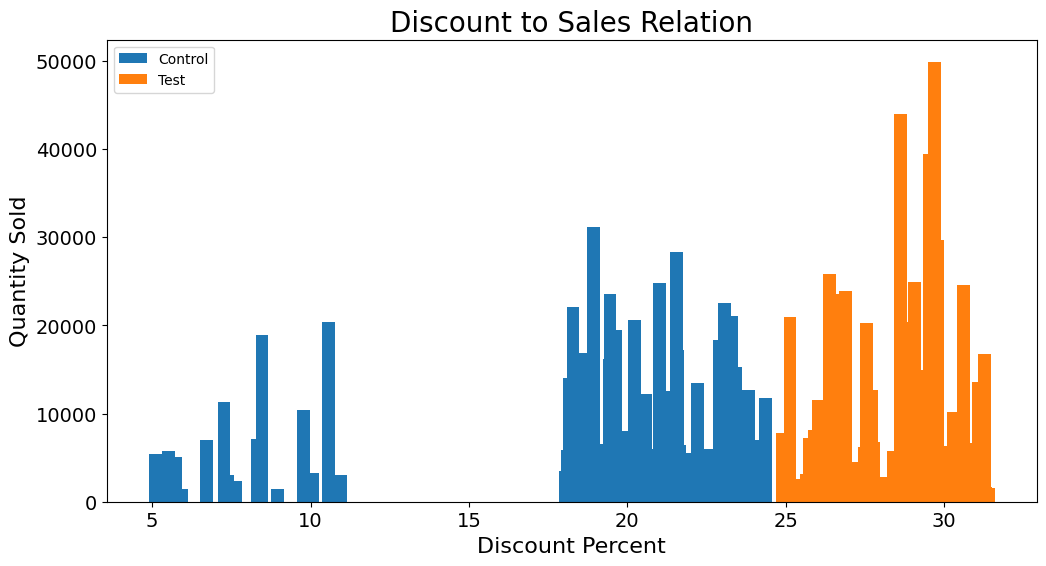

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(control['percent_of_discount'], control['quantity_sold'], width=0.4, label='Control', align='center')
plt.bar(test['percent_of_discount'] + 0.4, test['quantity_sold'], width=0.4, label='Test', align='center')
plt.title('Discount to Sales Relation', fontsize=20)
plt.xlabel('Discount Percent', fontsize=16)
plt.ylabel('Quantity Sold', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

Surprisingly, the bar plot reveals that higher discount percentages correspond to higher quantities of sales.

Now we'll find statistical significance of the difference in average of quantity sold in both groups.

In [48]:
a_sales = control['quantity_sold']

In [49]:
b_sales = test['quantity_sold']

In [50]:
def testing_average(sample1, sample2, alpha=0.05):
    
    # Shapiro-Wilk test for distribution normality 
    stat1, p1_norm = st.shapiro(sample1)
    stat2, p2_norm = st.shapiro(sample2)
    
    # Checking if both samples are normally distributed
    if p1_norm > alpha and p2_norm > alpha:
        
        # If both samples are normally distributed, perform Levene's test for homogeneity of variances
        statslev,p_levene = st.levene(sample1,sample2)
        
        # Checking if the variances are equal (p-value from Levene's test > alpha)
        if p_levene<alpha:
            
            # If variances are not equal, perform t-test
            statist,p_value = st.ttest_ind(sample1, sample2, equal_var=False)
        else:
             # If one or both samples are not normally distributed, perform Mann-Whitney U test
            statist,p_value = st.ttest_ind(sample1, sample2, equal_var=True)
    else:
        statist,p_value = st.mannwhitneyu(sample1, sample2)
        
# printing p-value and description of result
    print("P-value is: ", p_value)
    if p_value<alpha:
        # If p_value less then significance level that means that there is strong evidence against the H0 hypothesis.
        # And we confirm H1 hypothesis that mean that there is significant difference between groups. 
        print('Reject H0. There is a significant difference between the distributions.')
        
    else:
        # Else (p value greater than significance level) we can not reject H0 hypothesis and we don't have evidence in significant difference.
        print('Fail to Reject H0. There is no reason to consider the distributions are different')

In [51]:
testing_average(a_sales, b_sales, alpha=0.05)

P-value is:  0.01630913668780784
Reject H0. There is a significant difference between the distributions.


The p-value is significantly less than the significance level of 0.05, so we have rejected the null hypothesis (H0). This indicates that there is a significant difference between the control and test groups.

However, it is important to note that sales with a higher discount percentage are not greater than sales with a lower discount percentage. This means that the strategy of increasing discounts is not effective and may lead to losses.

# Conclusion 

**Based on our analysis of AtliQ Hardware's sales data, we have identified several key insights:**

1. Price and Sales Correlation:
Despite the increase in product prices, sales have risen by 50% or even doubled yearly. This indicates that price increases have not negatively impacted sales. However, it is crucial to avoid overpricing products to maintain this trend.


2. Product Popularity in Different Markets:
Graphic cards and internal HDDs are the most popular products in both India and China. However, sales in India significantly surpass those in China. This disparity suggests potential marketing gaps in China, which, despite its large consumer base, has not been fully capitalized on. The alignment in top-selling items across both countries indicates a universal demand for specific tech products.


3. Impact of Discounts on Sales:
Analysis shows that the number of sales per customer increases yearly regardless of discount size. Therefore, we cannot conclusively determine that discounts significantly affect sales volume.


4. Seasonal Sales Trends:
The highest sales occur in October, November, and December, likely due to the winter holidays, including Christmas and New Year. This seasonal trend should be leveraged in marketing strategies to maximize sales during these peak months.


5. Discount Strategy Optimization:
A/B testing reveals a significant difference between the control and test groups, as indicated by a p-value significantly less than 0.05. However, sales do not increase with higher discount percentages, suggesting that increasing discounts is not an effective strategy and may lead to losses.

Overall, our findings provide valuable insights for AtliQ Hardware to refine their pricing, marketing, and discount strategies, enhancing their sales performance and profitability across different markets.

https://public.tableau.com/app/profile/george.rabinovich/viz/shared/WC65DNPR2